In [1]:
import pandas as pd
import numpy as np
import graphviz
import os
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

os.environ["PATH"] += os.pathsep + 'D:/graphviz/bin'

In [27]:
df = pd.read_csv('test_cart.txt', header=0, delimiter=' ', index_col=[0])
df.head()

,age,income,student,credit-rating,class:buy_computer
RID,,,,,
1,youth,high,no,fair,no
2,youth,high,no,excellent,no
3,middle-aged,high,no,fair,yes
4,senior,medium,no,fair,yes
5,senior,low,yes,fair,yes


* After `le.fit`, *LabelEncoder()* will get `classes_` to encode the nominal values
* At this point, you can `label_encoder.transform(df.iloc[:, 0])` right away, don't need go thru `label_encoder.transform(label_encoder.classes_)`
* The reason running `.transform(label_encoder.classes_)` is to show how `.transform(df.iloc[:, 0])` works

In [28]:
le = LabelEncoder()
for i in range(df.shape[1]-1):
    label_encoder = le.fit(df.iloc[:, i])
    print('Nominal values in', df.columns[i], 'is', label_encoder.classes_)
    
    int_array = label_encoder.transform(label_encoder.classes_)
    transformed_values = label_encoder.transform(df.iloc[:, i])
    
    print('Integer values in', df.columns[i], 'is', int_array)
    print(pd.DataFrame({
        'original': df.iloc[:, i].values,
        'transformed': transformed_values
    }).head())
    
    df.iloc[:, i] = transformed_values
    
df.head()

Nominal values in age is ['middle-aged' 'senior' 'youth']
Integer values in age is [0 1 2]
      original  transformed
0        youth            2
1        youth            2
2  middle-aged            0
3       senior            1
4       senior            1
Nominal values in income is ['high' 'low' 'medium']
Integer values in income is [0 1 2]
  original  transformed
0     high            0
1     high            0
2     high            0
3   medium            2
4      low            1
Nominal values in student is ['no' 'yes']
Integer values in student is [0 1]
  original  transformed
0       no            0
1       no            0
2       no            0
3       no            0
4      yes            1
Nominal values in credit-rating is ['excellent' 'fair']
Integer values in credit-rating is [0 1]
    original  transformed
0       fair            1
1  excellent            0
2       fair            1
3       fair            1
4       fair            1


,age,income,student,credit-rating,class:buy_computer
RID,,,,,
1,2,0,0,1,no
2,2,0,0,0,no
3,0,0,0,1,yes
4,1,2,0,1,yes
5,1,1,1,1,yes


In [29]:
df_features = df[df.columns[:-1]]
df_class = df['class:buy_computer']

In [30]:
X = df_features.values
y = df_class.values
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

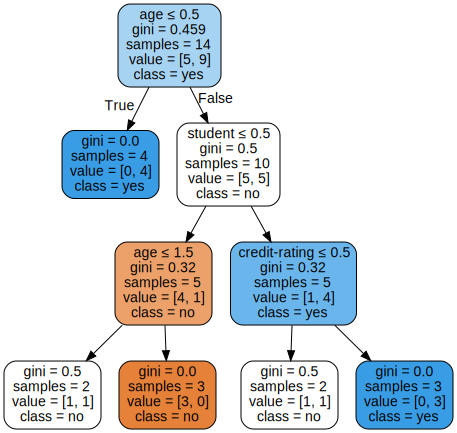

In [31]:
graph_cart = tree.export_graphviz(clf, out_file=None,
                                 feature_names=df_features.columns,
                                 class_names=np.unique(df.iloc[:, -1].values,),
                                 filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(graph_cart)
graph